In [60]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import os

Chargement du fichier .npy

In [61]:
data = np.load('data.npy')

On évalue les dimensions du dataset

In [62]:
print(data.shape)
print(data[0])

(1200, 4)
[662.26157739  54.39554155 -20.58877384 -37.70065046]


Nous choissions 2 méthodes de clustering et 2 méthode d'heuristique.

### Choix méthode de Clustering :
 - K-means -> Nous choisissons K-means en raison de son efficacité et de sa simplicité, le rendant adapté aux ensembles de données avec des clusters de taille égale.
 - Agglomerative Hierarchical Clustering -> Nous optons pour le Clustering Hiérarchique Agglomératif afin de capturer les relations hiérarchiques au sein des données.
### Choix d'Heuristics  :
 - Elbow method -> Nous choisissons la méthode du Coude pour déterminer le nombre optimal de clusters (K) dans K-means.
 - Silhouette method -> Nous choisissons la méthode Silhouette pour évaluer la qualité du clustering en mesurant la cohésion et la séparation.

**K-means avec méthode Elbow**

In [63]:
inertias = []
K = range(1, 10)

for k in K:
    KmeanModel = KMeans(n_clusters=k).fit(data)
    KmeanModel.fit(data)
    inertias.append(KmeanModel.inertia_)

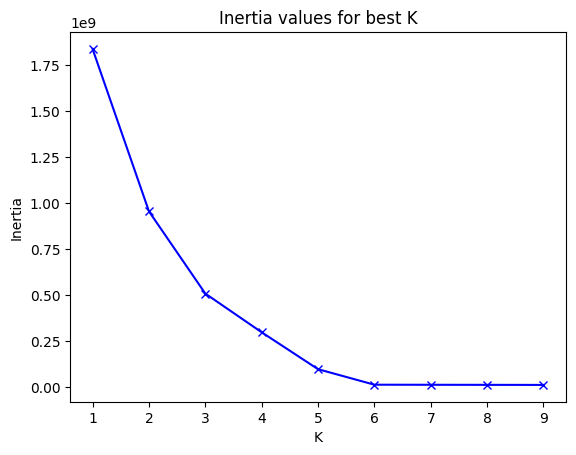

In [64]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('Inertia values for best K')
plt.show()

Le point 'elbow' se trouve la ou K à pour valeur 6, c'est donc là que se trouve la valeur optimale de K pour le clustering.

**K-means with Silhouette method**

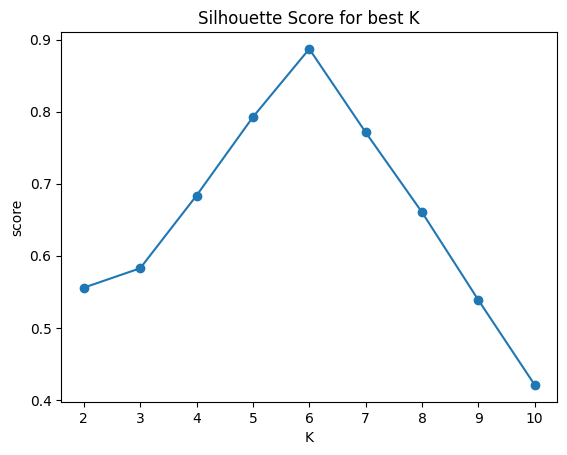

In [65]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for best K')
plt.xlabel('K')
plt.ylabel('score')
plt.show()

D'après K-means avec le score Silhouette comme heuristic, la valeur optimal de K pour le clustering est 6 comme l'indique le sommet du graphe.

***Agglomerative Hierarchical Clustering avec méthode Elbow (avec manhattan comme métrique)***

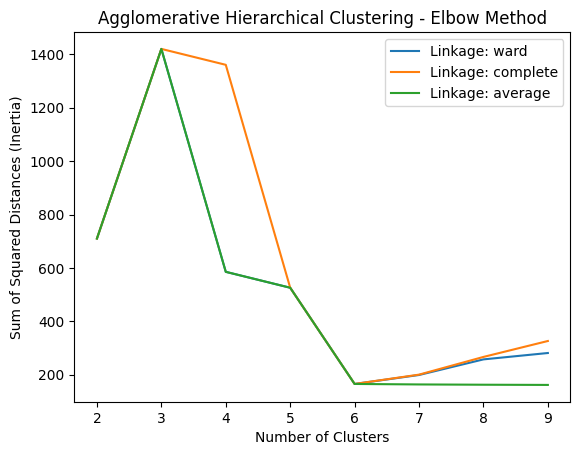

In [66]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt

cluster_range = range(2, 10)
linkage_methods = ['ward', 'complete', 'average']

for linkage in linkage_methods:
    inertia_values = []
    for n_clusters in cluster_range:
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        model.fit(data)
        labels = model.labels_
        cluster_centers = np.array([data[labels == i].mean(axis=0) for i in range(n_clusters)])
        # manhattan distance
        inertia = sum(pairwise_distances_argmin_min(cluster_centers, data, metric='manhattan')[1])
        inertia_values.append(inertia)
    plt.plot(cluster_range, inertia_values, label=f'Linkage: {linkage}')

plt.title('Agglomerative Hierarchical Clustering - Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.legend()
plt.show()


D'après le Agglomerative Hierachical Clustering avec méthode elbow, la valeur optimal du nombre de cluster est 6 d'après le elbow point du graphe.  

***Agglomerative Hierarchical Clustering avec méthode Silhouette (avec manhattan comme métrique)***

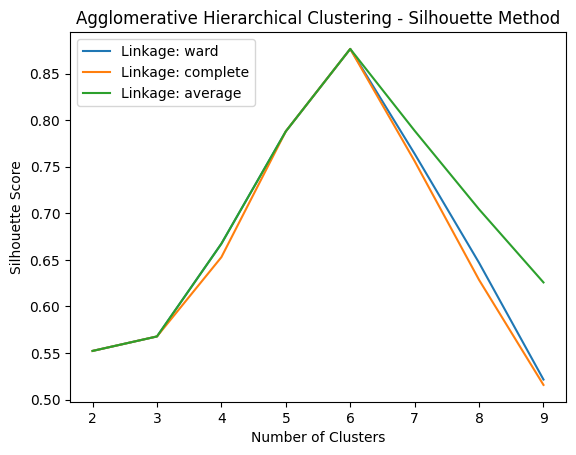

In [67]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

csluster_range = range(2, 10)
linkage_methods = ['ward', 'complete', 'average']

for linkage in linkage_methods:
    silhouette_scores = []
    for n_clusters in cluster_range:
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels = model.fit_predict(data)
        silhouette_avg = silhouette_score(data, labels, metric='manhattan')
        silhouette_scores.append(silhouette_avg)
    plt.plot(cluster_range, silhouette_scores, label=f'Linkage: {linkage}')

plt.title('Agglomerative Hierarchical Clustering - Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()


The peak happen when the number of cluster is 6

### Finding

In every combinations of clustering methods with heuristics we found that the optimal number of cluster is 6.

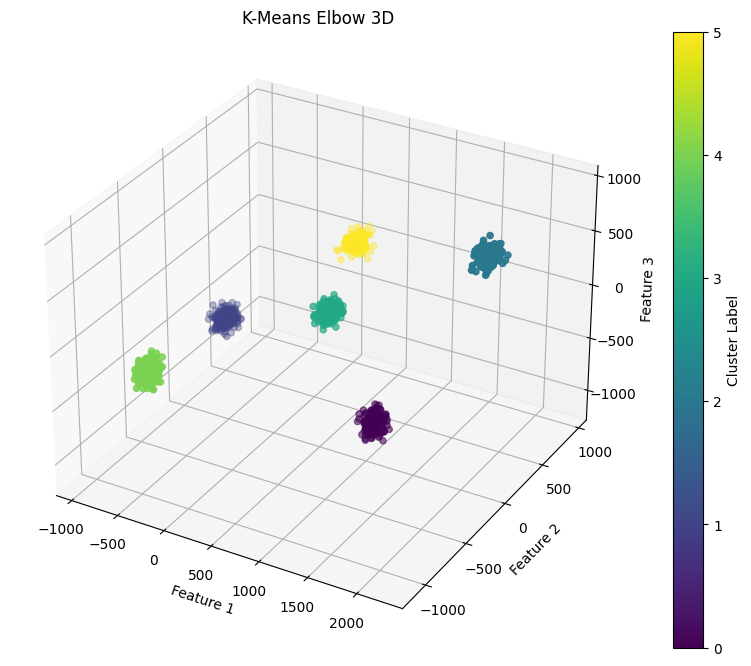

In [68]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d(data, optimal_k):
    kmeans = KMeans(n_clusters=optimal_k, random_state=420)
    kmeans_labels = kmeans.fit_predict(data)
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=kmeans_labels, cmap='viridis')
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=100, c='red', marker='X')
    ax.set_title('K-Means Elbow 3D')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    fig.colorbar(scatter, ax=ax, label='Cluster Label')
    plt.show()

optimal_k = 6
plot_3d(data, optimal_k)